# Text Classification


The solution is divided into the following sections:

- Data understanding and exploration
- Data Preprocessing
- Data preparation
- Model building and evaluation

## Data Understanding  And Exploration
Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# In this step we include all the necessary libraries required

In [2]:
 data=pd.read_csv("bbc-text.csv")
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


Since the data is in string format we need to typecast columns like Category to integer.

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['category'] = le.fit_transform(data['category'])
# here we typecast the classes in category to integer

In [4]:
data

,category,text
0,4,tv future in the hands of viewers with home th...
1,0,worldcom boss left books alone former worldc...
2,3,tigers wary of farrell gamble leicester say ...
3,3,yeading face newcastle in fa cup premiership s...
4,1,ocean s twelve raids box office ocean s twelve...
5,2,howard hits back at mongrel jibe michael howar...
6,2,blair prepares to name poll date tony blair is...
7,3,henman hopes ended in dubai third seed tim hen...
8,3,wilkinson fit to face edinburgh england captai...
9,1,last star wars not for children the sixth an...


In [6]:
print(data.shape)
print(data.columns)

(2225, 2)
Index(['category', 'text'], dtype='object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
category    2225 non-null int64
text        2225 non-null object
dtypes: int64(1), object(1)
memory usage: 34.8+ KB


Let us check for duplicate values in data

In [8]:
data[data.duplicated() == True].count()


category    99
text        99
dtype: int64

We found out the data contains some duplicate values so lets filter them out

In [9]:
data.drop_duplicates(keep=False,inplace=True) 

In [10]:
data[data.duplicated() == True].count()


category    0
text        0
dtype: int64

In [11]:
print(data.shape)

(2027, 2)


#### Now we have cleansed the data of duplicate values, Now lets check for null values

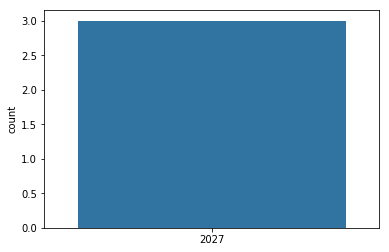

In [39]:
sns.countplot(data.isnull().count())

Data does not contain any null values so we are good to go

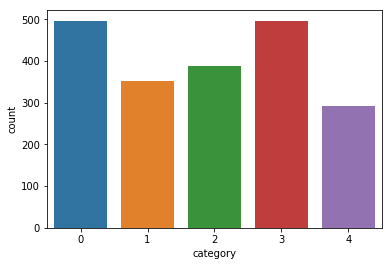

In [41]:
sns.countplot(x='category', data=data) # This graph displays the number for sentences in each class

#### This graph shows the number of sentences each class has

## Data Pre Processing
#### Our data exploration ends up at here. The next step will be preprocess the data in order to make the learning process more smooth.
Pre processing steps:

- Convert sentence into lower case
- Remove Stop Words
- Stemming

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(raw_text):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_text)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    words  = [WordNetLemmatizer().lemmatize(w) for w in words]
    
    #Stemming
    words = [SnowballStemmer('english').stem(word) for word in words]
    
    words = [word for word in words if len(word)>3]
    
    return(" ".join(words))

Stemming makes sure that different variations of a word, say ‘warm’, warmer’, ‘warming’ and ‘warmed,’ are represented by a single token - ‘warm’, because they all represent the same information (represented by the 'stem' of th

In [14]:
data['clean_text'] = data['text'].apply(lambda x: preprocess(x))
data['clean_text']

0       futur hand viewer home theatr system plasma hi...
1       worldcom left book alon former worldcom berni ...
2       tiger wari farrel gambl leicest rush make andi...
3       yead face newcastl premiership side newcastl u...
5       howard back mongrel jibe michael howard said c...
6       blair prepar name poll date toni blair like na...
7       henman hope dubai third seed henman slump stra...
8       wilkinson face edinburgh england captain jonni...
9       last star child sixth final star movi suitabl ...
10      berlin cheer anti nazi film german movi anti n...
11      virgin blue share plummet share australian bud...
12      crude price back cold weather across part unit...
14      moya emot davi carlo moya describ spain davi v...
15      korean credit card firm rescu south korea larg...
16      howard back stem cell research michael howard ...
17      connor boost british tenni former world number...
18      japanes bank battl japan sumitomo mitsui finan...
19      game m

In [42]:
data.head()
# An overview of our processed data

,category,text,clean_text
0,4,tv future in the hands of viewers with home th...,futur hand viewer home theatr system plasma hi...
1,0,worldcom boss left books alone former worldc...,worldcom left book alon former worldcom berni ...
2,3,tigers wary of farrell gamble leicester say ...,tiger wari farrel gambl leicest rush make andi...
3,3,yeading face newcastle in fa cup premiership s...,yead face newcastl premiership side newcastl u...
5,2,howard hits back at mongrel jibe michael howar...,howard back mongrel jibe michael howard said c...


In [44]:
np.savetxt('scores.csv', [p for p in zip(data['category'],data['clean_text'])], delimiter=',', fmt='%s')
print(len(data['text'][0]))
# Saving the data to a new csv file

4333


# Data Preparation
Let's now prepare the data and build the model.

In [19]:
x=data['clean_text']
y=data['category']

In [54]:
# splitting into test, train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, \
                                                    random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

train_acc = []
test_acc = []
train_loss = []
test_loss = []

(1418,)
(1418,)
(609,)
(609,)


Text to vector using Tf-idf

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

Train_Vector = TfidfVectorizer() # Tf-Idf
x_train = Train_Vector.fit_transform(x_train)
x_test=Train_Vector.transform(x_test)



# Model Building and Evaluation

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import log_loss

epochs = 10
train_acc = []
test_acc = []
train_loss = []
test_loss = []

for e in range(epochs):
    Regressor1 = LogisticRegression(max_iter=e)
    Regressor1.fit(x_train,y_train)
    y_pred_train1 = Regressor1.predict(x_train)
    y_pred_test1 = Regressor1.predict(x_test)
    train_score_1=accuracy_score(y_train,y_pred_train1)
    test_score_1=accuracy_score(y_test,y_pred_test1)
    pred_train = Regressor1.predict_proba(x_train)
    pred_test = Regressor1.predict_proba(x_test)
    i_train = log_loss(y_train,pred_train)
    i_test=log_loss(y_test,pred_test)
    print('Epoch',e)
    print('Accuracy Train score:',train_score_1)
    print('Accuracy Test score:',test_score_1)

    test_acc.append(test_score_1)
    train_acc.append(train_score_1)
    train_loss.append(i_train)
    test_loss.append(i_test)



Epoch 0
Accuracy Train score: 0.24259520451339917
Accuracy Test score: 0.24958949096880131
Epoch 1
Accuracy Train score: 0.7524682651622003
Accuracy Test score: 0.735632183908046
Epoch 2
Accuracy Train score: 0.9146685472496474
Accuracy Test score: 0.8686371100164204
Epoch 3
Accuracy Train score: 0.9901269393511989
Accuracy Test score: 0.9474548440065681
Epoch 4
Accuracy Train score: 0.9908321579689704
Accuracy Test score: 0.9540229885057471
Epoch 5
Accuracy Train score: 0.9929478138222849
Accuracy Test score: 0.9540229885057471
Epoch 6
Accuracy Train score: 0.9929478138222849
Accuracy Test score: 0.9540229885057471
Epoch 7
Accuracy Train score: 0.9929478138222849
Accuracy Test score: 0.9540229885057471
Epoch 8
Accuracy Train score: 0.9929478138222849
Accuracy Test score: 0.9540229885057471
Epoch 9
Accuracy Train score: 0.9929478138222849
Accuracy Test score: 0.9540229885057471


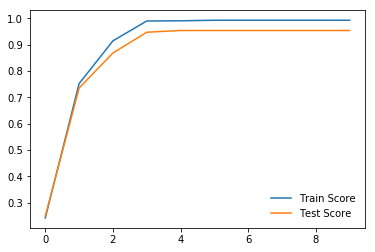

In [57]:
plt.clf()
plt.plot(train_acc,label='Train Score')
plt.plot(test_acc,label='Test Score')
plt.legend(frameon=False)


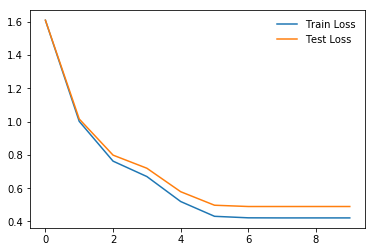

In [58]:
plt.plot(train_loss,label='Train Loss')
plt.plot(test_loss,label='Test Loss')
plt.legend(frameon=False)

In [59]:
pred = Regressor1.predict_proba(x_test)
from sklearn.metrics import log_loss
i=log_loss(y_test,pred)
print(i)

0.49008654576917726


Here we used logistic regression model because the results we got from it were better than other models.
Highest accuracy was achieved using this model so we prepared the graph of this model only

## Highest train accuracy- 0.9929478138222849
## Highest Test Accuracy - 0.9540229885057471
## Loss score - 0.49008654576917726